In [1]:
import base_compnal
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
N = 100
polynomial_degree = 3
num_sweeps = 1000
num_samples = 1000
T_list = [(i + 1)/100 for i in range(100)]
val = -2.0/(N - 1)/(N -2)

In [3]:
interaction = [0 for _ in range(polynomial_degree)]
interaction[polynomial_degree - 1] = val

In [4]:
model = base_compnal.model.PolynomialIsing(N, interaction, base_compnal.Lattice.INFINIT_RANGE)
solver = base_compnal.solver.ClassicalMonteCarlo(model, base_compnal.Updater.METROPOLIS)
solver.set_num_sweeps(num_sweeps)
solver.set_num_samples(num_samples)

In [5]:
mag_list = []
ene_list = []
for T in tqdm(T_list):
    solver.set_temperature(T)
    solver.run()
    mag_list.append(sum(solver.get_magnetizations())/num_samples)
    ene_list.append(sum(solver.get_energies())/num_samples/N)


100%|██████████| 100/100 [44:23<00:00, 26.64s/it]


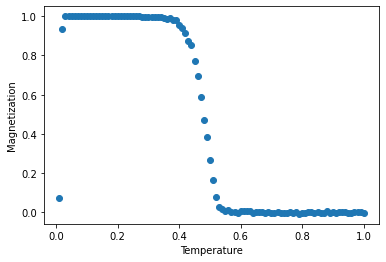

In [6]:
plt.scatter(T_list, mag_list)
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.savefig("out.eps")

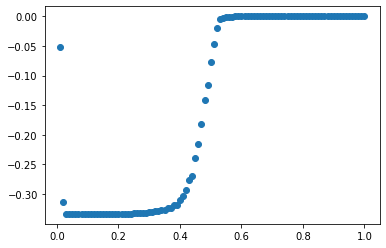

In [7]:
plt.scatter(T_list, ene_list)